In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
house_df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv")
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
house_df1 = house_df.copy()
house_df1.drop(['area_type', 'availability', 'society', 'balcony'], axis=1, inplace=True)
house_df1.nunique()

location      1305
size            31
total_sqft    2117
bath            19
price         1994
dtype: int64

In [7]:
house_df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
house_df1.dropna(inplace=True)

In [9]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
house_df1['size'] = house_df1['size'].apply(lambda x: float(x.split()[0])) 
house_df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056,2.0,39.07
1,Chikka Tirupathi,4.0,2600,5.0,120.00
2,Uttarahalli,3.0,1440,2.0,62.00
3,Lingadheeranahalli,3.0,1521,3.0,95.00
4,Kothanur,2.0,1200,2.0,51.00


In [11]:
house_df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [12]:
def total_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [13]:
house_df1['total_sqft'] = house_df1['total_sqft'].apply(total_sqft)
house_df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


In [14]:
house_df1.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [15]:
house_df1.dropna(inplace = True)

In [16]:
house_df1[~house_df1['total_sqft'].apply(lambda x: isfloat(x))]

,location,size,total_sqft,bath,price


In [41]:
house_df1.loc[30]

location      Yelahanka
size                4.0
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [17]:
house_df1['location'].nunique()

1298

In [18]:
house_df1['location'] = house_df1['location'].apply(lambda x: x.strip())
house_df1.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00
5,Whitefield,2.0,1170.0,2.0,38.00
6,Old Airport Road,4.0,2732.0,4.0,204.00
7,Rajaji Nagar,4.0,3300.0,4.0,600.00
8,Marathahalli,3.0,1310.0,3.0,63.25
9,Gandhi Bazar,6.0,1020.0,6.0,370.00


In [19]:
loc_stats = house_df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [20]:
loc_stats_less_than_10 = loc_stats[loc_stats<=10]

In [21]:
house_df1['location'] = house_df1['location'].apply(lambda x: 'Other' if x in loc_stats_less_than_10 else x)
house_df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


In [22]:
house_df1['price_per_sqft'] = house_df1['price']*100000/house_df1['total_sqft']
house_df1.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,51.00,4250.000000
5,Whitefield,2.0,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4.0,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4.0,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3.0,1310.0,3.0,63.25,4828.244275
9,Other,6.0,1020.0,6.0,370.00,36274.509804


In [23]:
house_df1 = house_df1[~(house_df1["total_sqft"]/house_df1['size']<=300)]
house_df1.shape

(12274, 6)

In [24]:
house_df1['price_per_sqft'].describe()

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [25]:
def remove_outlier(df_in, col):
  for i in col:
    q1 = df_in[i].quantile(0.25)
    q3 = df_in[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[i] > fence_low) & (df_in[i] < fence_high)]
  return df_out

In [26]:
house_df2 = remove_outlier(house_df1, ['price_per_sqft'])
house_df2.shape

(11316, 6)

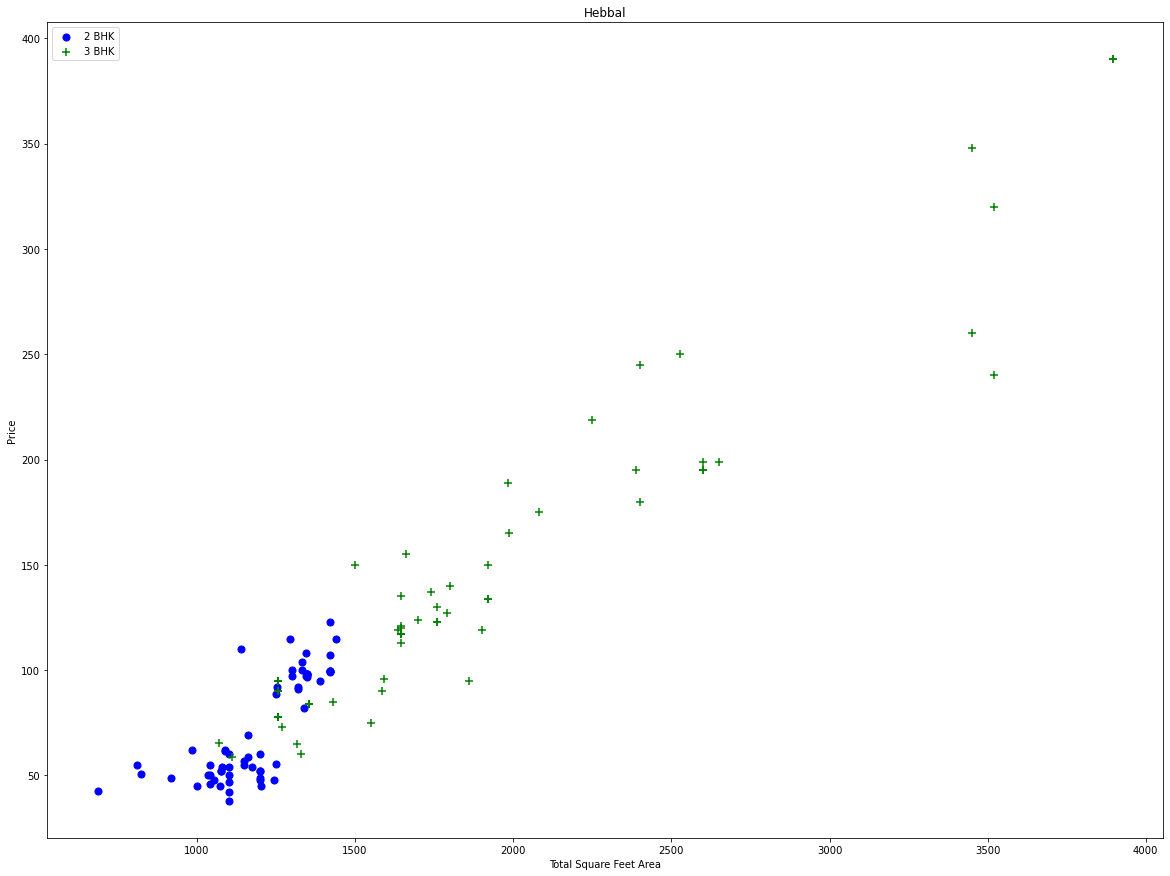

In [27]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location']==location) & (df['size']==2)]
    bhk3 = df[(df['location']==location) & (df['size']==3)]
    plt.figure(figsize=(20,15))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK',s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='green', marker='+', label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(house_df2, 'Hebbal')

We can remove those properties for the same location, whose price of 3 BHK is less then that of 2 BHK (with same area)

In [28]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [29]:
house_df2 = remove_bhk_outliers(house_df2)
house_df2.shape

(8136, 6)

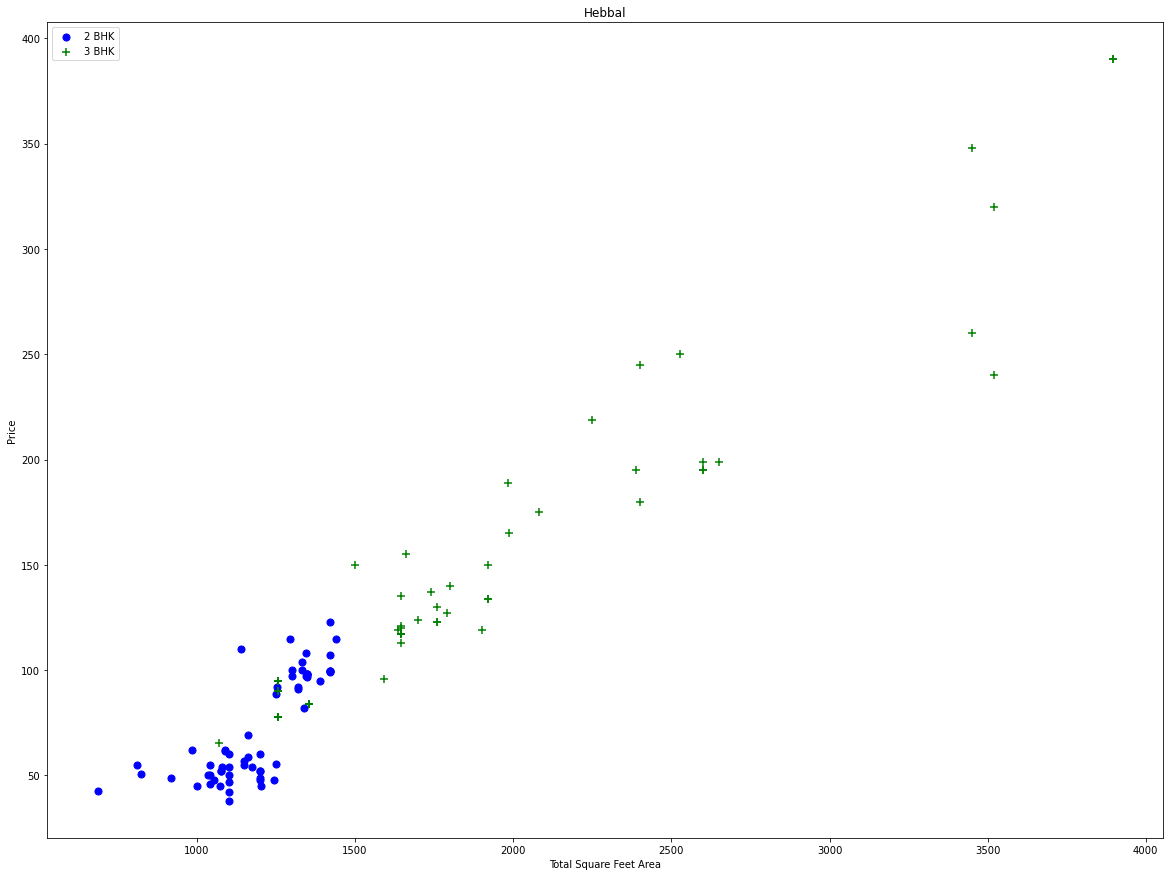

In [30]:
plot_scatter_chart(house_df2, 'Hebbal')

<AxesSubplot:xlabel='Price Per Square Feet', ylabel='Count'>

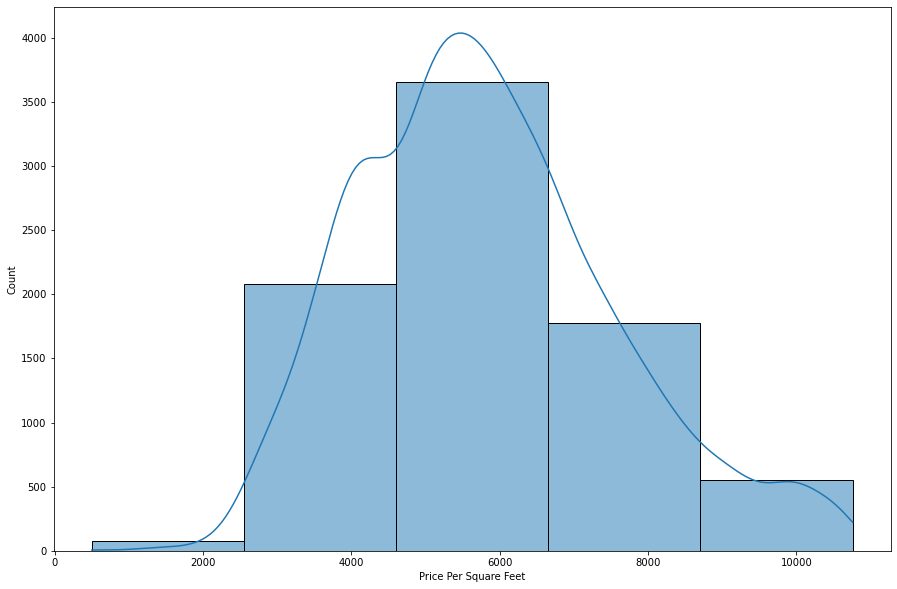

In [31]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
sns.histplot(house_df2['price_per_sqft'], kde=True, bins=5)

In [32]:
house_df2['bath'].unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [33]:
house_df2[house_df2['bath']>10]

,location,size,total_sqft,bath,price,price_per_sqft
3096,Other,10.0,12000.0,12.0,525.0,4375.000000
3609,Other,16.0,10000.0,16.0,550.0,5500.000000
7979,Other,11.0,6000.0,12.0,150.0,2500.000000
8636,Neeladri Nagar,10.0,4000.0,12.0,160.0,4000.000000
9935,Other,13.0,5425.0,13.0,275.0,5069.124424


<AxesSubplot:xlabel='Bathrooms', ylabel='Count'>

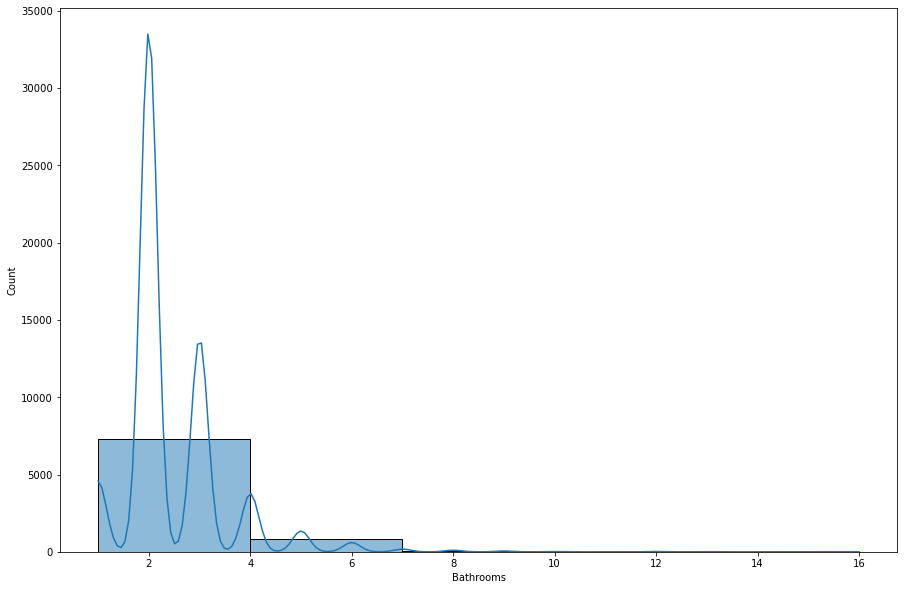

In [34]:
plt.figure(figsize=(15,10))
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.histplot(house_df2['bath'], kde=True, bins=5)

In [35]:
house_df2 = house_df2[house_df2['bath']<house_df2['size']+2]
house_df2.shape

(8058, 6)

In [36]:
house_df2.drop('price_per_sqft',axis=1, inplace=True)

In [37]:
dummies = pd.get_dummies(house_df2['location']).drop('Other', axis=1)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
house_df3 = pd.concat([house_df2, dummies], axis=1).drop('location', axis=1)
house_df3.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,1056.0,2.0,39.07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,95.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,51.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,2732.0,4.0,204.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
house_df3.shape

(8058, 243)

In [40]:
X = house_df3.drop('price', axis=1)
Y = house_df3['price']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

-34409758542227.016

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, Y_train)
lasso.score(X_test, Y_test)

0.7265058799815389

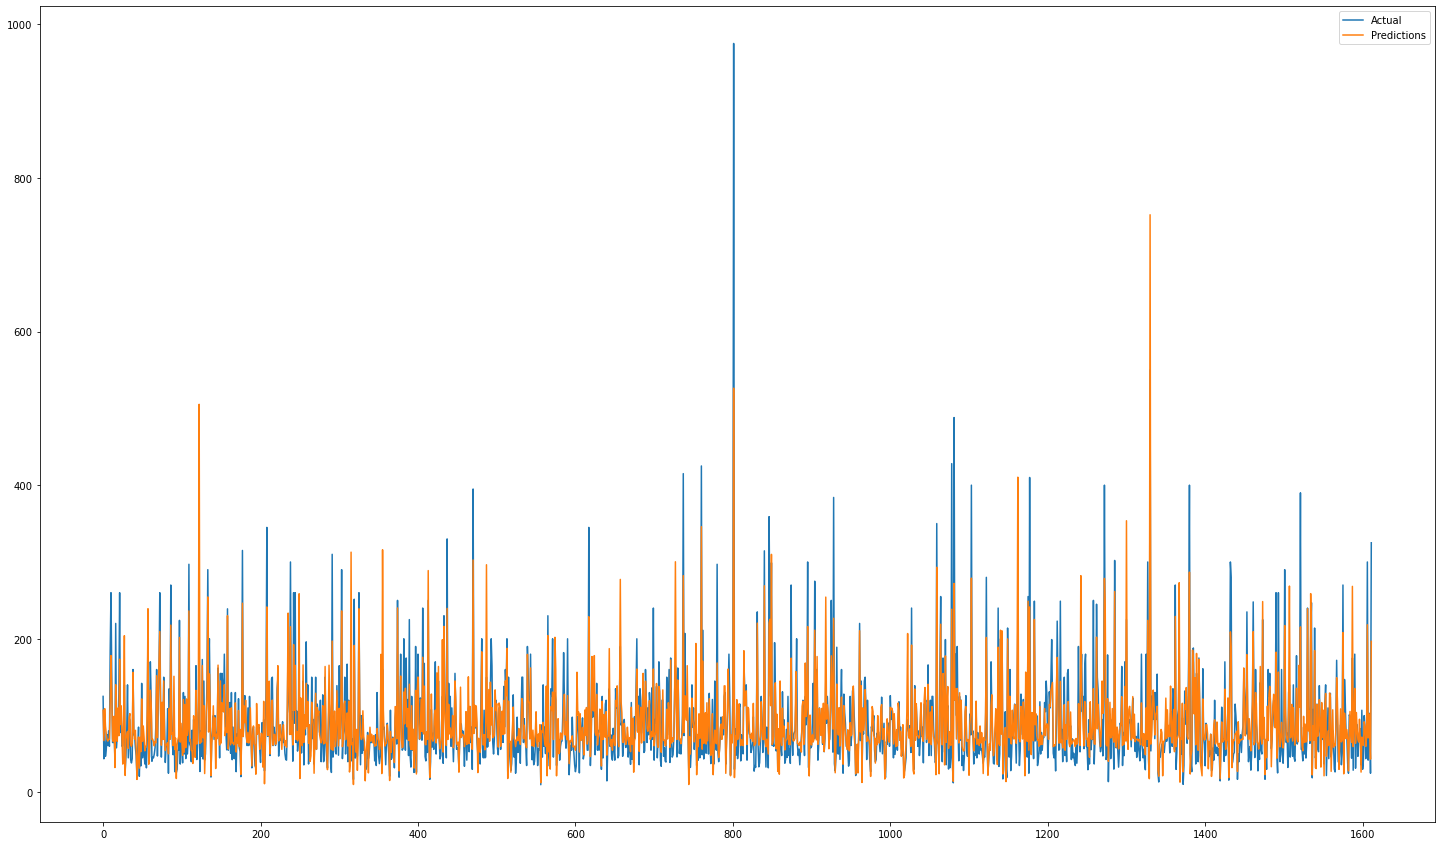

In [44]:
model_predict_lasso = lasso.predict(X_test)
results_df = pd.DataFrame()
results_df['Predictions'] = list(model_predict_lasso)
results_df['Actual'] = list(Y_test)
results_df.plot(y=["Actual", "Predictions"],
        kind="line", figsize=(25,15))
plt.show()

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, Y_train)
ridge.score(X_test, Y_test)

0.7635027737334218

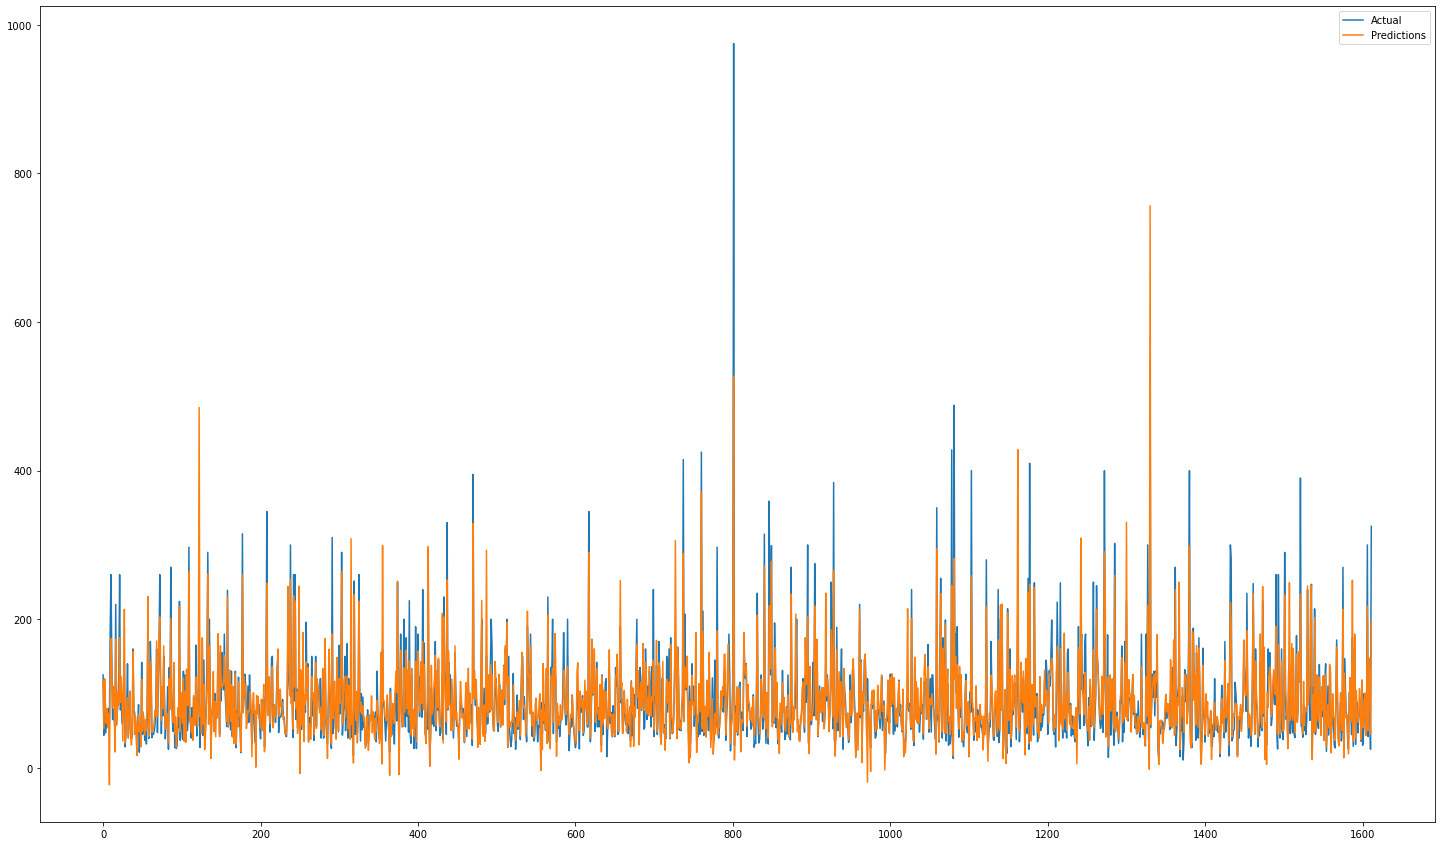

In [46]:
model_predict_ridge = ridge.predict(X_test)
results_df = pd.DataFrame()
results_df['Predictions'] = list(model_predict_ridge)
results_df['Actual'] = list(Y_test)
results_df.plot(y=["Actual", "Predictions"],
        kind="line", figsize=(25,15))
plt.show()

In [47]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, Y_train)
en.score(X_test, Y_test)

0.7387319423625561

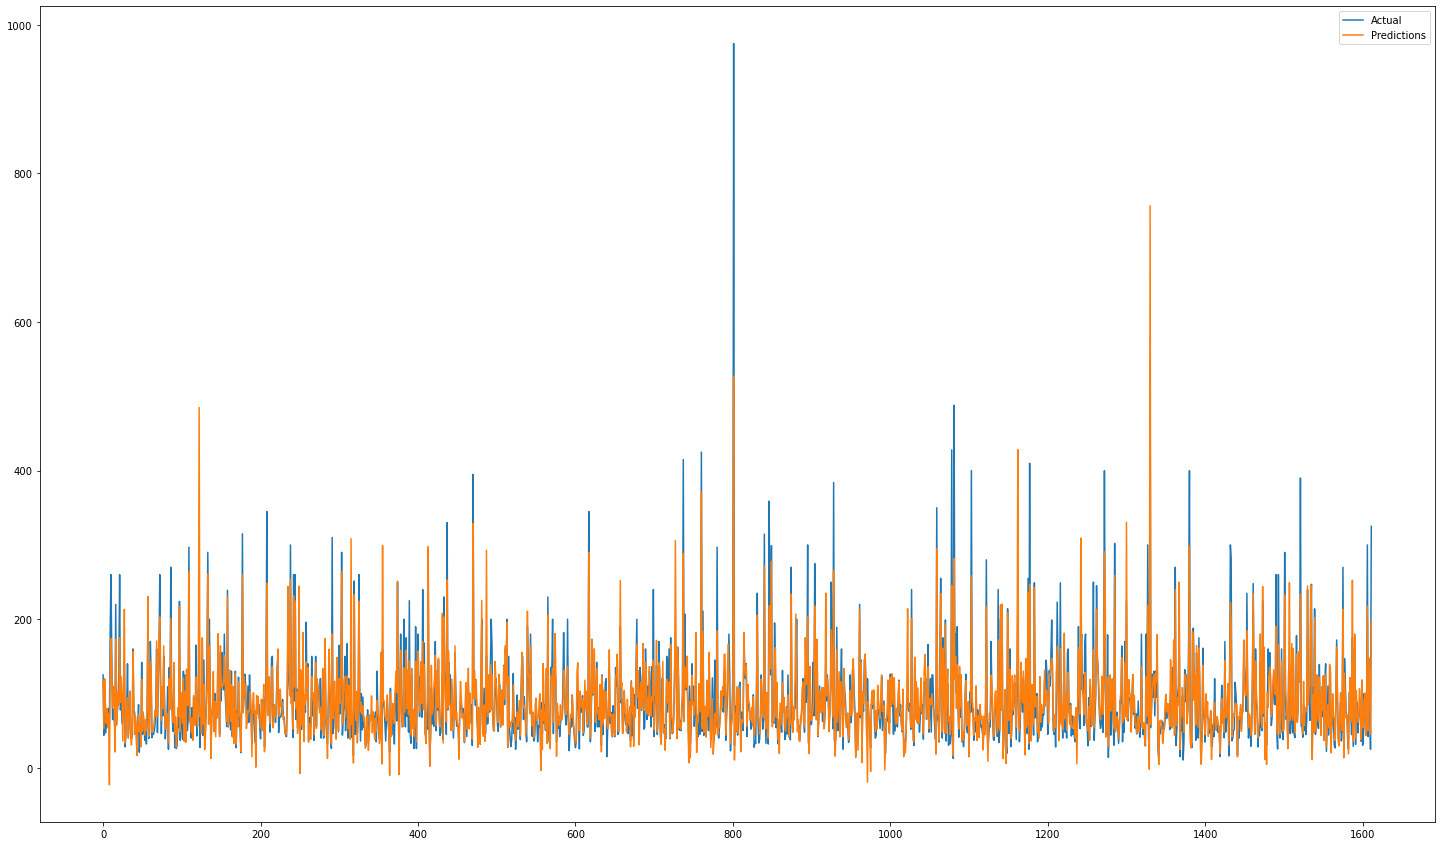

In [49]:
model_predict_en = ridge.predict(X_test)
results_df = pd.DataFrame()
results_df['Predictions'] = list(model_predict_en)
results_df['Actual'] = list(Y_test)
results_df.plot(y=["Actual", "Predictions"],
        kind="line", figsize=(25,15))
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decison_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', "random"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=53)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_,
            'best_estimator' : gs.best_estimator_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'best_estimator'])

In [60]:
find_best_model_using_gridsearchcv(X,Y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_

,model,best_score,best_params,best_estimator
0,linear_regression,-7.018886e+13,{'normalize': False},LinearRegression(normalize=False)
1,lasso,7.015018e-01,"{'alpha': 1, 'selection': 'cyclic'}",Lasso(alpha=1)
2,decison_tree,7.054763e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}",DecisionTreeRegressor(criterion='friedman_mse')


In [61]:
dtr = DecisionTreeRegressor(criterion='friedman_mse')
dtr.fit(X_train, Y_train)
dtr.score(X_test, Y_test)

0.7268914727960303

In [66]:
def predict_price(location, size, sqft, bath):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = size
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    return ridge.predict([x])[0]

In [67]:
predict_price('Indira Nagar', 2, 1000, 2)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


95.87671913789791

In [68]:
predict_price('1st Phase JP Nagar', 2, 1000, 2)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


92.39918934076083

In [69]:
predict_price('Indira Nagar', 3, 1000, 3)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


115.62983518752092

In [71]:
import pickle
with open('real_estate_price_prediction.pickle', 'wb') as f:
    pickle.dump(ridge, f)

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))